In [6]:
%load_ext autoreload
%autoreload 2
# The above two cell magic commands auto reloads the imported modules
# and uses the most current version. This is helpful is one makes changes to
# any of the imported modules code and wants to use the recently modified module.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# IMPORTS:

In [7]:
import numpy as np
import pandas as pd

import eda 
import clf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# DATA:

In [3]:
df_original = pd.read_csv('CC_FRAUD.csv', dtype_backend='pyarrow', engine='pyarrow')
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype          
---  ------  --------------   -----          
 0   Time    284807 non-null  double[pyarrow]
 1   V1      284807 non-null  double[pyarrow]
 2   V2      284807 non-null  double[pyarrow]
 3   V3      284807 non-null  double[pyarrow]
 4   V4      284807 non-null  double[pyarrow]
 5   V5      284807 non-null  double[pyarrow]
 6   V6      284807 non-null  double[pyarrow]
 7   V7      284807 non-null  double[pyarrow]
 8   V8      284807 non-null  double[pyarrow]
 9   V9      284807 non-null  double[pyarrow]
 10  V10     284807 non-null  double[pyarrow]
 11  V11     284807 non-null  double[pyarrow]
 12  V12     284807 non-null  double[pyarrow]
 13  V13     284807 non-null  double[pyarrow]
 14  V14     284807 non-null  double[pyarrow]
 15  V15     284807 non-null  double[pyarrow]
 16  V16     284807 non-null  double[pyarrow]
 17  V17     28

# TR-VAL-TS SPLIT:

In [4]:
df_Xy = df_original
y_idx = -1

df_tr_, df_val_, df_ts_ = eda.fn_tr_val_ts_split(df_Xy, y_idx)

df_tr, df_val, df_ts, scaler = eda.fn_standardize_df(df_tr_, to_transform = [df_val_, df_ts_])
df_tr.shape, df_val.shape, df_ts.shape

((170884, 31), (56961, 31), (56962, 31))

In [5]:
df_tr.head()

,y,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.499137,-0.430143,0.463459,0.800149,-1.934880,0.211584,-0.664218,0.719895,-0.243919,...,-0.026048,-0.017874,-0.063432,-0.771515,-0.642216,1.235345,-0.109194,-0.579533,0.116668,-0.304076
1,0,-1.129859,-0.676619,1.444300,0.092089,0.179392,0.519775,-0.836650,1.565604,-1.063878,...,2.086904,-0.503779,0.822047,-0.127625,0.630838,-0.690146,-1.077520,1.364258,-1.015729,-0.348475
2,0,0.445841,-0.531977,0.490154,-0.163589,-2.076608,1.001201,0.720844,0.394383,0.769478,...,-0.392167,-0.225548,-0.782509,-0.063856,-1.595238,-0.451956,0.950474,0.328040,0.231855,-0.348037
3,0,1.467942,0.046686,0.473790,-0.456997,0.982677,0.928748,-0.504587,0.602919,-0.152598,...,0.381638,0.048901,0.276893,-0.136364,0.868156,-1.046533,1.477764,0.425566,0.688609,-0.294838
4,0,0.686680,-2.576537,0.563624,-0.990432,-0.514083,0.256007,-0.049376,1.147069,-2.347490,...,-2.181025,1.164445,-1.273901,-0.069455,0.914240,0.364851,-0.786481,-7.420303,4.927590,0.094678


# CLASS DISTRIBUTION:

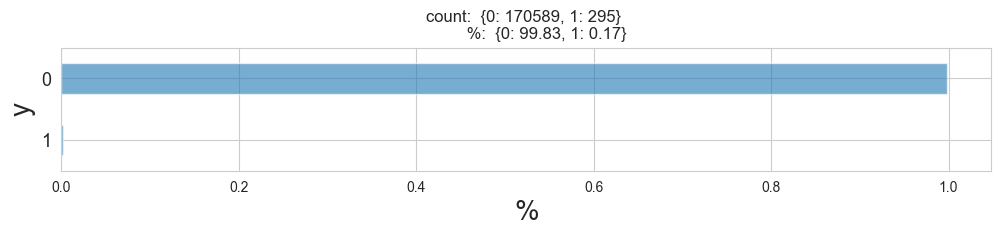

In [57]:
df_data = df_tr
feat = 'y'

eda.fn_plot_bar(df_data, feat)

## MUTUAL INFORMATION OF FEATS WITH LABEL COLUMN:

In [59]:
df_data, y_idx = df_tr, 0

mutual_info = eda.fn_mutual_info_numeric_feats(df_data, clfn = True)

# CORRELATION:

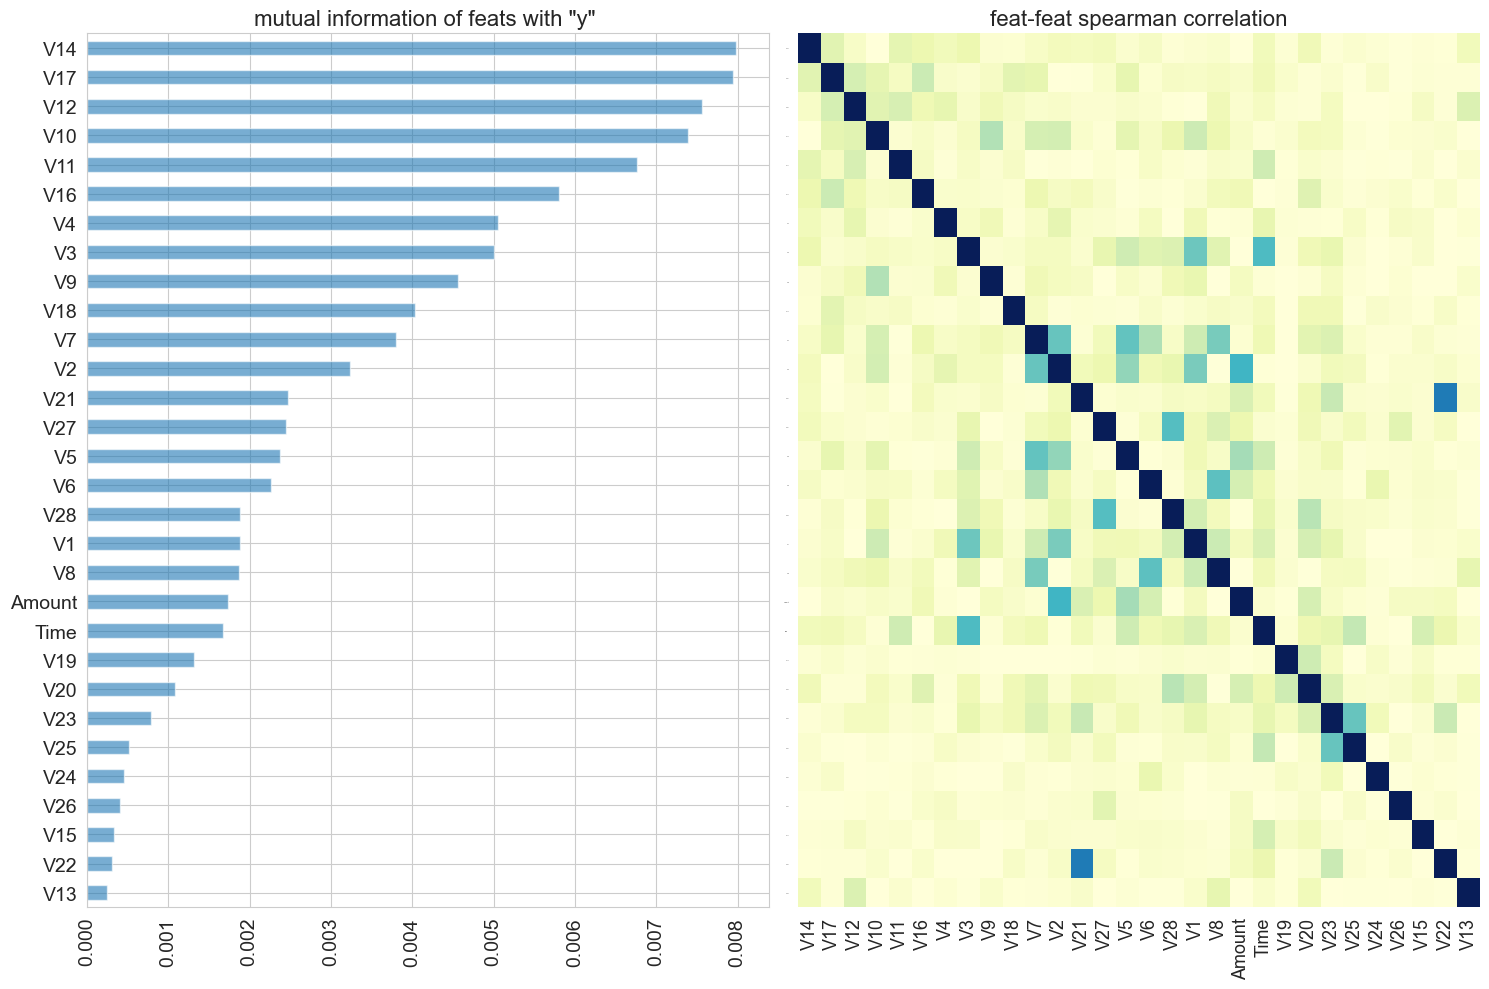

In [60]:
df_data = df_tr

eda.fn_plot_corr_clfn(df_data, mutual_info)

# FEATURE DISTRIBUTIONS:

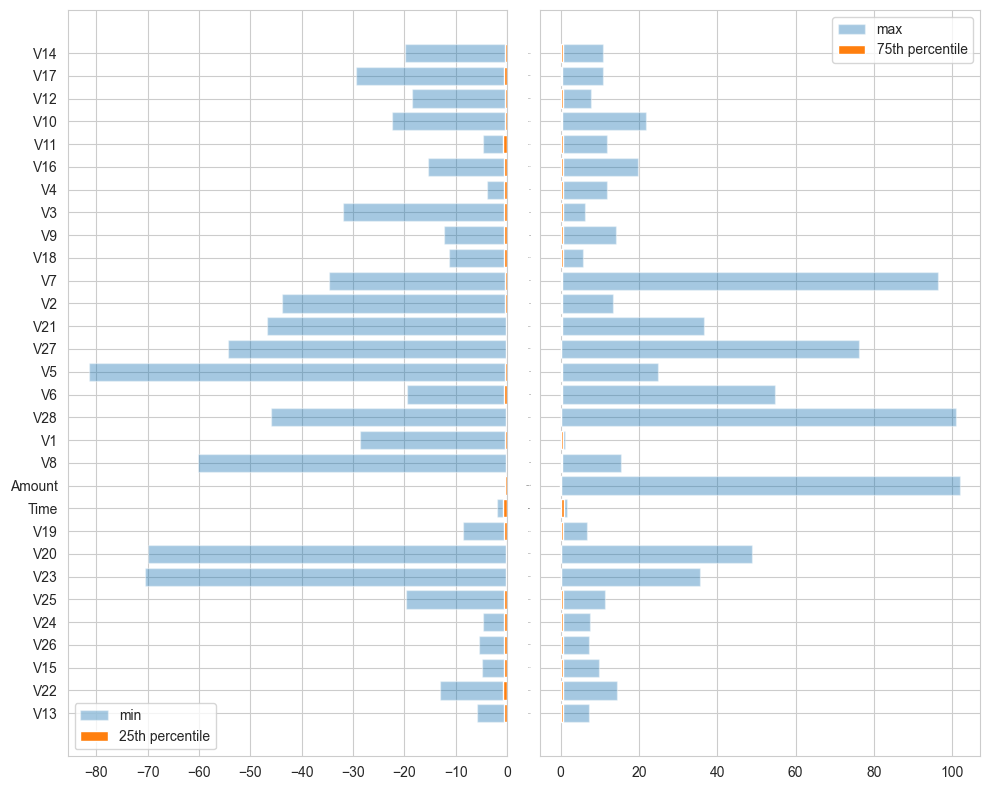

In [63]:
df_data = df_tr

eda.fn_viz_numeric_percentiles(df_data, mutual_info)

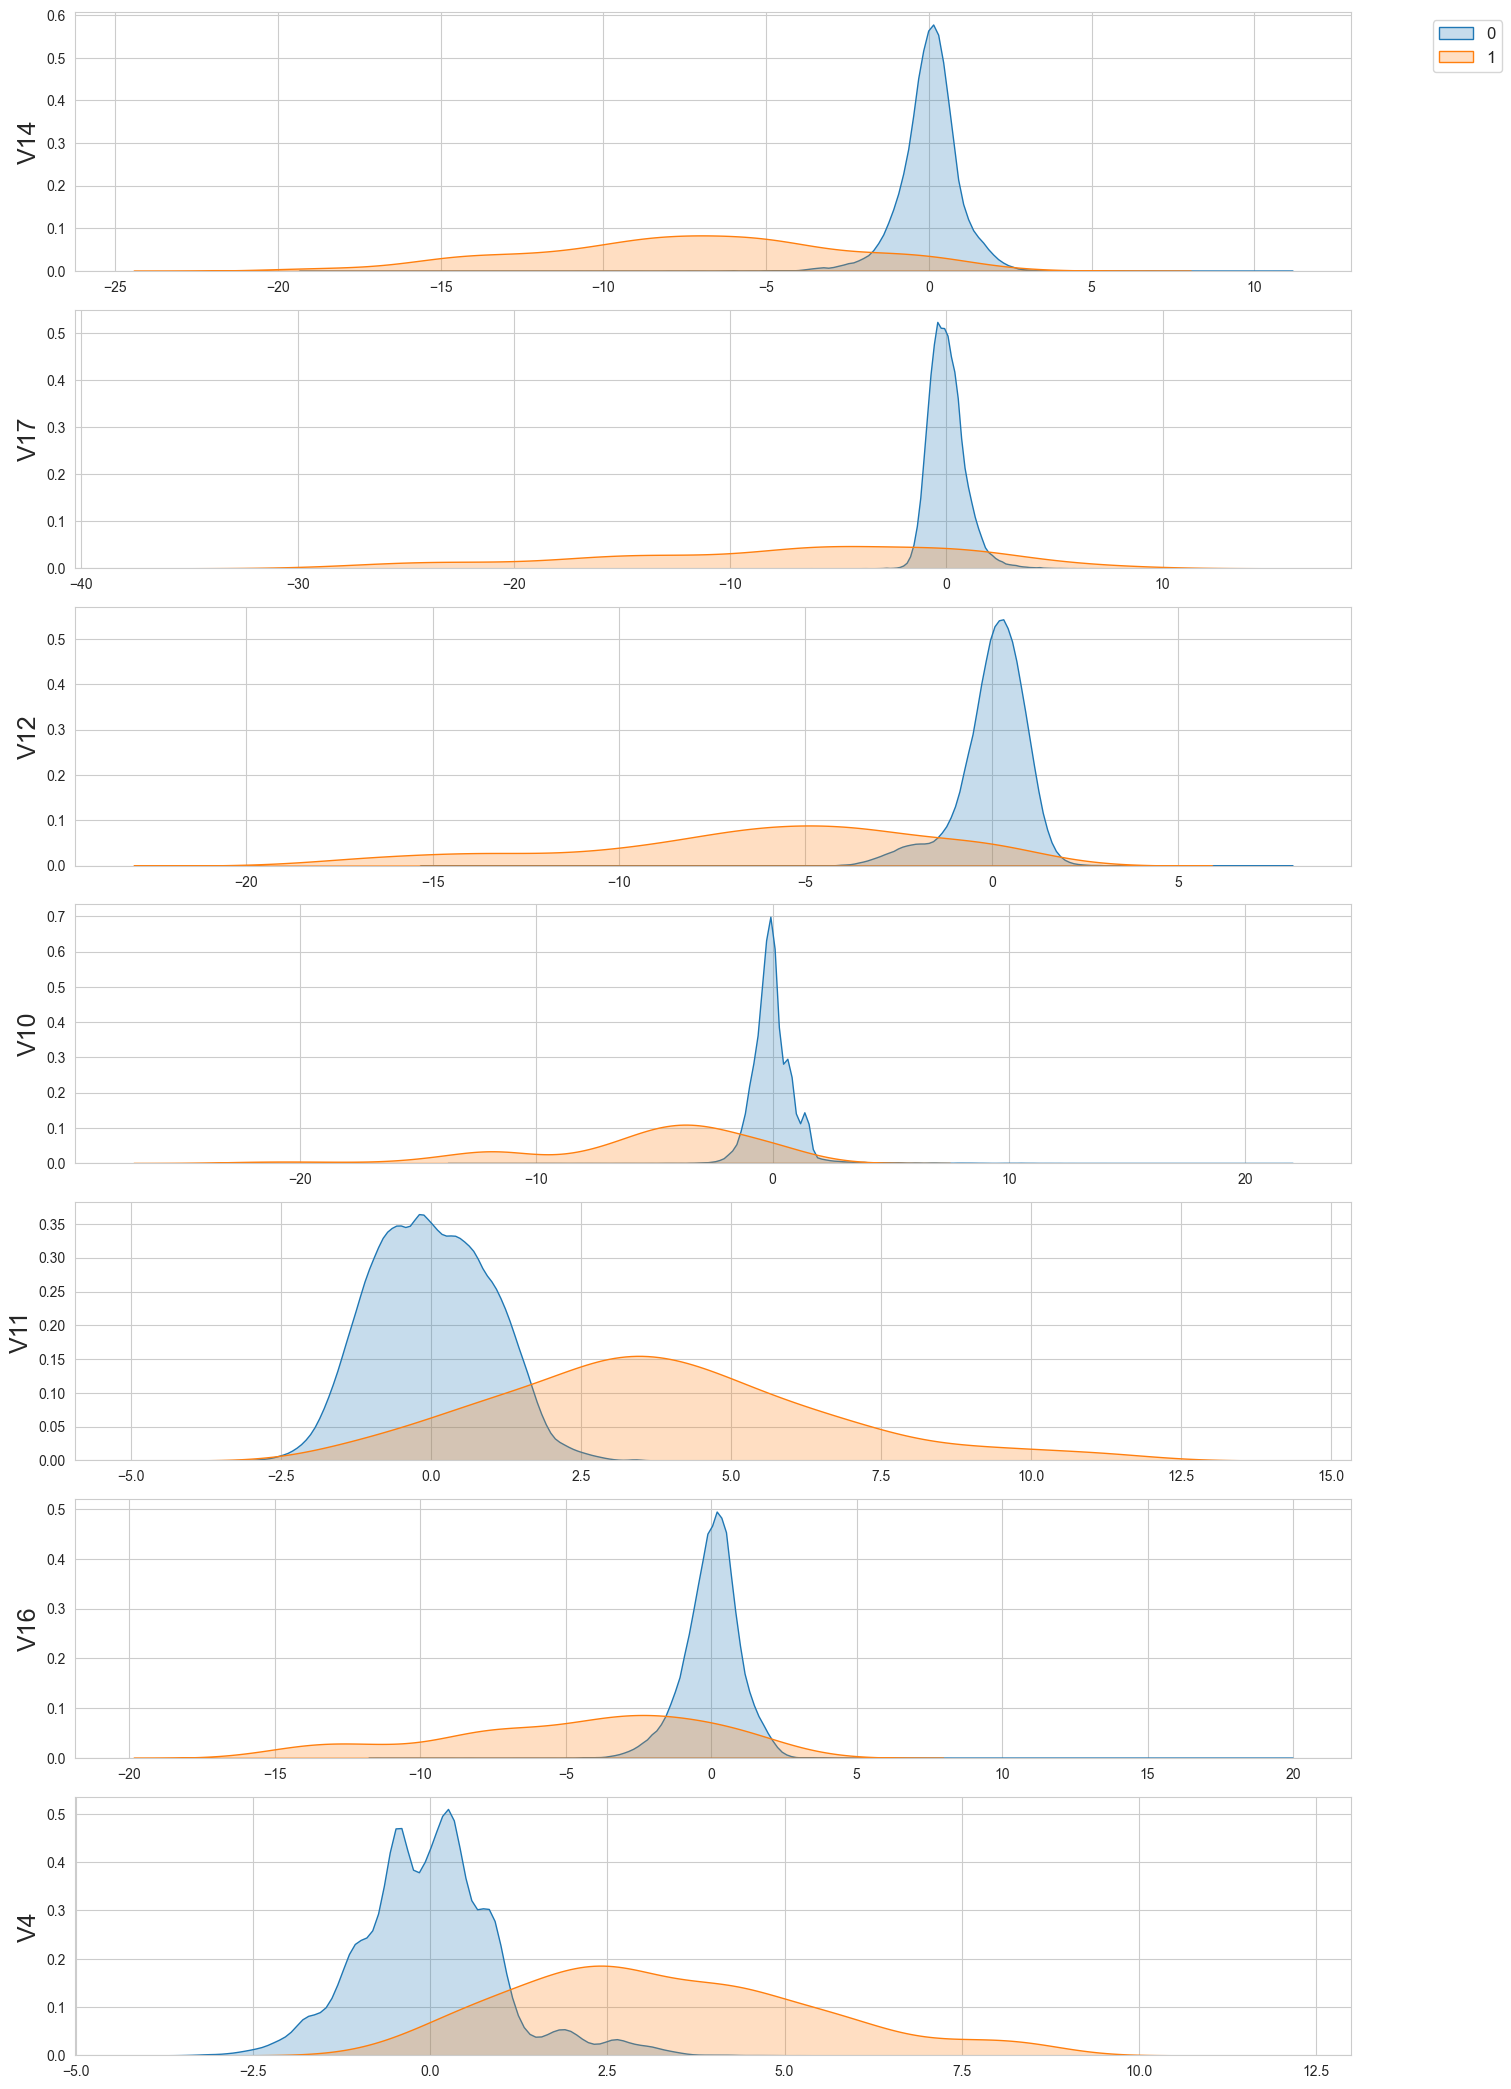

In [64]:
df_data = df_tr
y_idx = 0

eda.fn_viz_numeric_distributions_wrt_y(df_data, mutual_info, y_idx,  ht_factor = 3, n_top_feats = 7)

## FEATURE THRESHOLD BASED MODELS:

In [115]:
df_data = df_tr
feat = 'V14'
thresh_class_1 = -5

clf.fn_feat_threshold_performance(df_data, feat, thresh_class_1)

accuracy: 99.86


,prec,rec,f1
0,99.95,99.91,99.93
1,57.88,68.47,62.73


In [116]:
feat = 'V17'
thresh_class_1 = -3

clf.fn_feat_threshold_performance(df_data, feat, thresh_class_1)

accuracy: 99.89


,prec,rec,f1
0,99.94,99.95,99.95
1,70.76,66.44,68.53


In [ ]:
feat = 'V12'
thresh_class_1 = -4.5

clf.fn_feat_threshold_performance(df_data, feat, thresh_class_1)

accuracy: 99.9


,prec,rec,f1
0,99.93,99.97,99.95
1,79.20,60.68,68.71


# SAVE PROCESSED DATASETS:

In [30]:
df_tr.to_csv('df_CCF_tr.csv', index = False)
df_val.to_csv('df_CCF_val.csv', index = False)
df_ts.to_csv('df_CCF_ts.csv', index = False)